In [3]:
!pip install geopandas
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [1]:
from glob import glob
import rasterio
import matplotlib.pyplot as plt


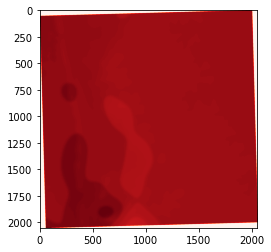

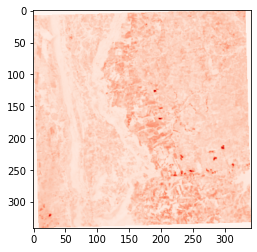

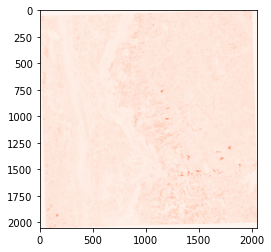

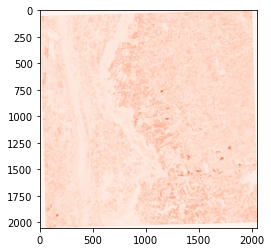

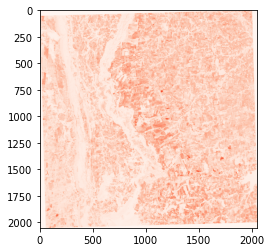

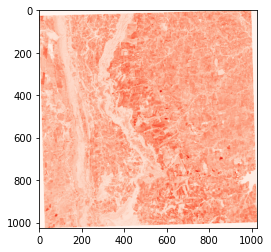

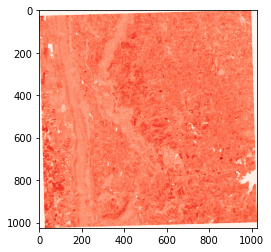

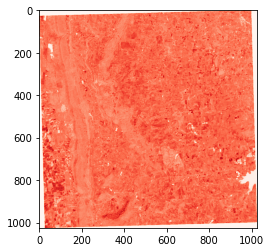

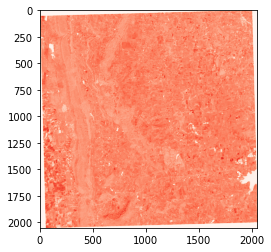

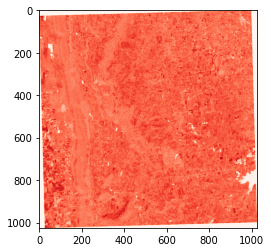

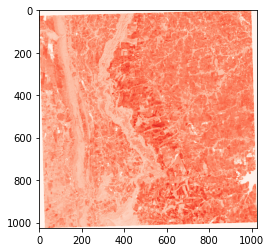

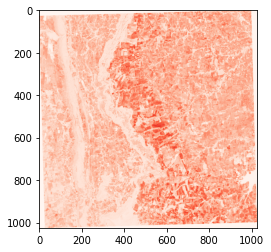

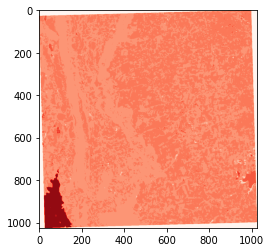

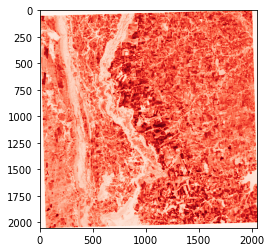

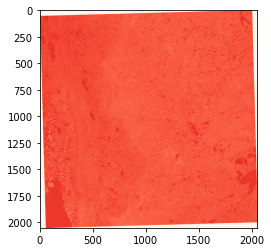

In [2]:
tmp = glob('/content/drive/MyDrive/VarunaHackathon2022/sentinel-2-image/2021/20210101/IMG_DATA/*.jp2')
for i in tmp:
  R_dataset = rasterio.open(i)
  R = R_dataset.read()[0]
  plt.figure()
  plt.imshow(R, cmap='Reds')

In [3]:
# # Open image files
# R_dataset = rasterio.open('/content/drive/MyDrive/VarunaHackathon2022/sentinel-2-image/2020/20200102/IMG_DATA/47PQS_20200102_AOT.jp2')
# NIR_dataset = rasterio.open('/content/drive/MyDrive/VarunaHackathon2022/sentinel-2-image/2020/20200102/IMG_DATA/47PQS_20200102_B01.jp2')
# print(f'Dataset profile : {R_dataset.profile}') # `profile` contains metadata about an image such as dimension, number of channels, and co-ordinate reference system 

# # Read image data from dataset
# R = R_dataset.read()[0]       # Read raster data from dataset, the array size will be equal to dimension in the dataset profile
# NIR = NIR_dataset.read()[0]

# plt.figure()
# plt.imshow(R, cmap='Reds')
# plt.figure()
# plt.imshow(NIR)

In [2]:
import geopandas as gpd

shapefile = gpd.read_file("/content/drive/MyDrive/VarunaHackathon2022/training_area/traindata.shp")
shapefile

,years,crop_type,geometry
0,2021,1,"POLYGON ((774604.014 1671240.055, 774606.506 1..."
1,2021,1,"POLYGON ((773367.837 1670278.438, 773389.600 1..."
2,2021,1,"POLYGON ((771648.671 1673990.960, 771707.027 1..."
3,2021,3,"POLYGON ((771306.117 1674174.738, 771426.678 1..."
4,2021,2,"POLYGON ((763750.339 1678588.825, 763879.691 1..."
...,...,...,...
1312,2021,3,"POLYGON ((769004.617 1679027.544, 769130.199 1..."
1313,2021,3,"POLYGON ((772624.509 1673384.254, 772770.291 1..."
1314,2021,1,"POLYGON ((774333.243 1669788.192, 774337.269 1..."
1315,2021,3,"POLYGON ((768880.988 1687424.354, 768996.565 1..."


{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': 0.0, 'width': 2051, 'height': 2051, 'count': 1, 'crs': CRS.from_epsg(32647), 'transform': Affine(10.0, 0.0, 754360.0,
       0.0, -10.0, 1688690.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True}
Class pixel count: {1: 100162, 2: 29069, 3: 84342, 4: 23309}


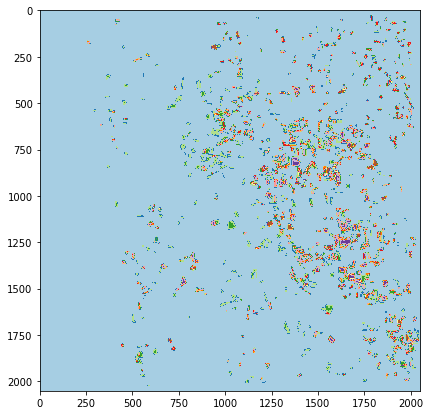

In [3]:
from rasterio.features import rasterize
import numpy as np
img_profile = rasterio.open('/content/drive/MyDrive/VarunaHackathon2022/sentinel-2-image/2021/20210101/IMG_DATA/47PQS_20210101_AOT.jp2').profile
label = gpd.read_file('/content/drive/MyDrive/VarunaHackathon2022/training_area/traindata.shp').to_crs(img_profile['crs'])
target_image = rasterize(
    shapes=[(row.geometry, int(row.crop_type)) for i, row in label.iterrows()], # Construct polygon and value tuples
    out_shape=(img_profile['width'], img_profile['height']),
    transform=img_profile['transform']                                          # This will make every pixel in the target image align correctly with satellite image
)
classes, pixel_counts = np.unique(target_image, return_counts=True)
print(img_profile)
print('Class pixel count: ' + str(dict(zip(classes[1:], pixel_counts[1:]))))
plt.figure(figsize=(7,7))
plt.imshow(target_image, cmap='Paired')

In [7]:
# import cv2
# class feature_extract(object):
#   def __init__(self, size, path, gdf):
#     self.gdf = gdf
#     self.size = size
#     self.path = path
    
#     img_profile = rasterio.open(path[0]).profile
#     label = gdf.to_crs(img_profile['crs'])
#     labels = rasterize(
#         shapes=[(row.geometry, int(row.crop_type)) for i, row in label.iterrows()], # Construct polygon and value tuples
#         out_shape=(img_profile['width'], img_profile['height']),
#         transform=img_profile['transform']                                          # This will make every pixel in the target image align correctly with satellite image
#     )
#     self.labels = cv2.resize(labels, self.size)
     
#   def __call__(self):
#     arr = []
#     for i in self.path:
#       img = rasterio.open(i)
#       img = img.read()[0]
#       reshaped_img = cv2.resize(img, self.size)
#       arr.append(reshaped_img)
#     arr = np.stack(arr, axis=-1)

#     return {'img':arr, 'labels':self.labels}

In [9]:
# gdf = gpd.read_file('/content/drive/MyDrive/VarunaHackathon2022/training_area/traindata.shp')
# path = glob('/content/drive/MyDrive/VarunaHackathon2022/sentinel-2-image/2021/20210101/IMG_DATA/*.jp2')
# ob = feature_extract((200,200), path, gdf)
# img = ob()

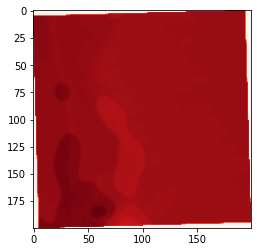

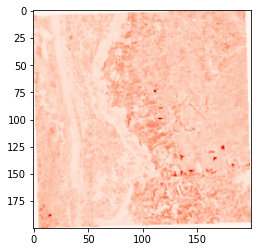

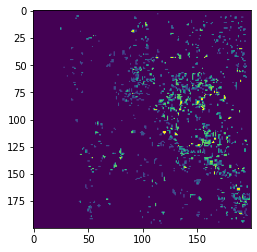

In [11]:
# plt.figure()
# plt.imshow(img['img'][:,:,0], cmap='Reds')
# plt.figure()
# plt.imshow(img['img'][:,:,1], cmap='Reds')
# plt.figure()
# plt.imshow(img['labels'])

In [44]:
main_path = glob('/content/drive/MyDrive/VarunaHackathon2022/sentinel-2-image/2021/*')
NDVI_list = []
for i in main_path:
  b4 = glob(i+'/IMG_DATA/*4.jp2')[0]
  b8 = glob(i+'/IMG_DATA/*8.jp2')[0]
  a = rasterio.open(b4)
  a = a.read()[0] / 65535
  b = rasterio.open(b8)
  b = b.read()[0] / 65535
  NDVI = (b-a) / (b+a)
  NDVI_list.append(NDVI)

NDVI_np = np.stack(NDVI_list)
NDVI_np[np.isnan(NDVI_np)] = 0
MASKED_NDVI = (target_image!=0) * NDVI_np
# np.save('Masked_NDVI.npy',MASKED_NDVI)
np.save('/content/drive/MyDrive/TestMasked_NDVI.npy',MASKED_NDVI)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [69]:
main_path = glob('/content/drive/MyDrive/VarunaHackathon2022/sentinel-2-image/2020/*')
img_profile = rasterio.open('/content/drive/MyDrive/VarunaHackathon2022/sentinel-2-image/2020/20200102/IMG_DATA/47PQS_20200102_B04.jp2').profile
label = gpd.read_file('/content/drive/MyDrive/VarunaHackathon2022/testing_area/testdata.shp').to_crs(img_profile['crs'])
crop_type = []
target_image = rasterize(
    shapes=[(row.geometry, int(1)) for i, row in label.iterrows()], # Construct polygon and value tuples
    out_shape=(img_profile['width'], img_profile['height']),
    transform=img_profile['transform']                                          # This will make every pixel in the target image align correctly with satellite image
)

NDVI_list = []
for i in main_path:
  b4 = glob(i+'/IMG_DATA/*4.jp2')[0]
  b8 = glob(i+'/IMG_DATA/*8.jp2')[0]
  a = rasterio.open(b4)
  a = a.read()[0] / 65535
  b = rasterio.open(b8)
  b = b.read()[0] / 65535
  NDVI = (b-a) / (b+a)
  NDVI_list.append(NDVI)

NDVI_np = np.stack(NDVI_list)
NDVI_np[np.isnan(NDVI_np)] = 0
MASKED_NDVI = (target_image!=0) * NDVI_np
# np.save('Masked_NDVI.npy',MASKED_NDVI)
np.save('/content/drive/MyDrive/TestMasked_NDVI.npy',MASKED_NDVI)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


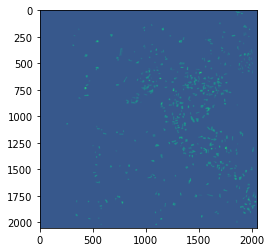

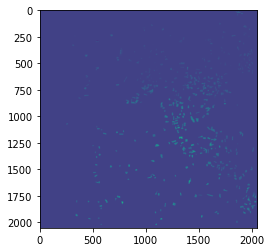

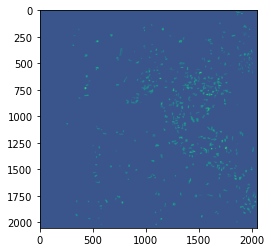

In [72]:
plt.figure()
plt.imshow(MASKED_NDVI[0])
plt.figure()
plt.imshow(MASKED_NDVI[1])
plt.figure()
plt.imshow(MASKED_NDVI[2])

In [9]:
def PrepareData(path, target_image):
  MASKED_NDVI = np.load(path)
  i,j = np.where(target_image != 0)
  X = MASKED_NDVI[:,i,j]
  del MASKED_NDVI
  Y = target_image[i,j]
  return X,Y

In [10]:
X,Y = PrepareData(path = '/content/Masked_NDVI.npy', target_image)
X = np.swapaxes(X,0,1)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=42)

In [39]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [40]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.956773185866858


In [41]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))


In [42]:
!cp finalized_model.sav /content/drive/MyDrive

In [73]:
def PrepareTestData(MASKED_NDVI, target_image):
  i,j = np.where(target_image != 0)
  X = MASKED_NDVI[:,i,j]
  Y = target_image[i,j]
  return np.swapaxes(X,0,1),Y

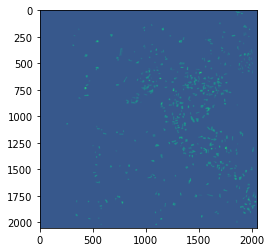

In [74]:
plt.imshow(MASKED_NDVI[0])

In [78]:
from rasterio.features import rasterize
import numpy as np
from tqdm import tqdm
img_profile = rasterio.open('/content/drive/MyDrive/VarunaHackathon2022/sentinel-2-image/2020/20200102/IMG_DATA/47PQS_20200102_B04.jp2').profile
label = gpd.read_file('/content/drive/MyDrive/VarunaHackathon2022/testing_area/testdata.shp').to_crs(img_profile['crs'])
crop_type = []
for i,row in tqdm(label.iterrows()):
  target_image = rasterize(
      shapes=[(row.geometry, 1)], # Construct polygon and value tuples
      out_shape=(img_profile['width'], img_profile['height']),
      transform=img_profile['transform']                                          # This will make every pixel in the target image align correctly with satellite image
  )
  X, Y = PrepareTestData(MASKED_NDVI, target_image)
  y_pred = clf.predict(X)
  counts = np.bincount(y_pred)
  lab = np.argmax(counts)
  crop_type.append(lab)

565it [16:50,  1.79s/it]


In [89]:
import pandas as pd
df = pd.DataFrame(crop_type, columns=['crop_type'])

In [90]:
df.to_csv('/content/drive/MyDrive/submission.csv')

In [91]:
df

,crop_type
0,2
1,2
2,1
3,1
4,2
...,...
560,2
561,2
562,2
563,1


In [82]:
df.value_counts()

2    343
1    215
3      6
4      1
dtype: int64